In [7]:
from fastai.vision.all import *
from fastai.data.all import *
from fastai.distributed import *
import pandas as pd
from pathlib import Path

from videofig import videofig

In [ ]:
#export
import cv2
import random

In [17]:
#export
class createVideoTensor(Transform):
    def __init__(self, l=50, skip=3):
        self.l = l
        self.skip = skip
    def encodes(self, vid_path):
        l, skip = self.l, self.skip
        vid = cv2.VideoCapture(str(vid_path))
        duration = vid.get(cv2.CAP_PROP_FRAME_COUNT)
        vid_tens, block = L(), l*skip
        start, i = random.randint(0, max(0,duration - block)), 0 
        while len(vid_tens) < l:
            check = start + i*skip
            vid.set(cv2.CAP_PROP_POS_FRAMES, check)
            res, frame = vid.read()
            if res: 
                vid_tens.append(frame)
            else:
                # If video is shorter than the block
                reap =  l // len(vid_tens)
                delta = l % len(vid_tens)
                vid_tens = vid_tens * reap + vid_tens[0:delta]
                break
            i += 1           
        vid.release()
        return TensorVideo(vid_tens.stack().permute(3,0,1,2))

class RandomCropVid(Transform):
    def __init__(self, size: tuple ):
        self.size = size
    def encodes(self, ts_vd):
        return T.RandomCrop(self.size)(ts_vd)
    
class RandomHFlipVid(Transform):
    def __init__(self, p ):
        self.p = p
    def encodes(self, ts_vd):
        return T.RandomHorizontalFlip(self.p)(ts_vd)


In [31]:
vid_tens = create_video_tensor('/mnt/data/eugeniomarinelli/UCF_Crimes/Videos/Abuse/Abuse002_x264.mp4')

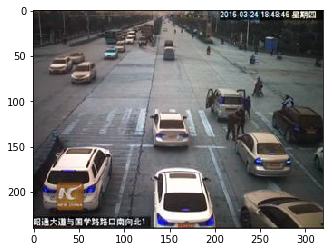

In [36]:
plt.imshow(vid_tens[49])

In [1]:
from nbdev.export import *
notebook2script()

Converted 00_core.ipynb.
Converted 01_triplet_loss.ipynb.
Converted 02_inflator.ipynb.
Converted 03_video_block.ipynb.
Converted 04_charades.ipynb.
Converted 05_ucf.ipynb.
Converted 06_distributed_inflated_NN.ipynb.
Converted 07_read_video_function.ipynb.
Converted Untitled.ipynb.
Converted index.ipynb.


In [37]:
# default_exp video_block